## Problem 1

In [49]:
def newton(x0, f, f1,maxiter = 15, tol = 1e-5):
    """Implements Newton's method for minimization
    Inputs: x0 - initial guess
        f - first derivative of f
        f1 - second derivative of f
    Returns: approximation to the minimizer provided
    that the algorithm converges for initial condition"""
    maxiter = maxiter
    xold = x0
    if f1(xold) != 0:
        xnew = xold - f(xold)/f1(xold)
    else:
        raise ValueError("Function or initial condition resulted in division by 0")
    iterations = 1
    while iterations < maxiter:
        xold = xnew
        if f1(xold) != 0:
            xnew = xold - f(xold)/f1(xold)
            if abs(xnew - xold) < tol:
                break
        else:
            raise ValueError("Function or initial condition resulted in division by 0")
        iterations += 1
    print("Root is " + str(xnew))
    print("Stopped after " + str(iterations) + " iterations")
    print("Distance between x vals = " + str(abs(xnew-xold)))
    return xnew

In [50]:
# Test Case 1

import math
f = lambda x: math.exp(x)-2
f1 = lambda x: math.exp(x)

newton(0.5,f,f1)
true_value = math.log(2)
print("True value = " + str(true_value))

Root is 0.6931471805599454
Stopped after 3 iterations
Distance between x vals = 1.9398647244095457e-08
True value = 0.6931471805599453


In [51]:
# Test Case 2

f = lambda x: x**4-3
f1 = lambda x: 4*x**3

newton(0.5, f, f1)
true_value = math.sqrt(math.sqrt(3))
print("True value = " + str(true_value))

Root is 1.3160740129524924
Stopped after 10 iterations
Distance between x vals = 3.75212239056566e-09
True value = 1.3160740129524924


## Problem 2

In [52]:
#Preliminary functions called

def centered4(f, x, h=0.001):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

def newton_est(x0, f, maxiter = 15, tol = 1e-5):
    """Computes Newton's method with estimate for first derivative
    Uses the centered4 method to estimate first derivative each time"""
    maxiter = maxiter
    xold = x0
    if centered4(f,xold) != 0:
        xnew = xold - f(xold)/centered4(f,xold)
    else:
        raise ValueError("Function or initial condition resulted in division by 0")
    iterations = 1
    while iterations < maxiter:
        xold = xnew
        if f1(xold) != 0:
            xnew = xold - f(xold)/centered4(f,xold)
            if abs(xnew - xold) < tol:
                break
        else:
            raise ValueError("Function or initial condition resulted in division by 0")
        iterations += 1
    print("Root is " + str(xnew))
    print("Stopped after " + str(iterations) + " iterations")
    return xnew

In [53]:
def find_r(N1, N2, P1, P2, r0):
    """Uses Newton's method to find r given initial guess r0"""
    f = lambda x: P2*(1-(1+x)**(-N2)) - P1*((1+x)**N1 - 1)
    return newton_est(r0, f)

In [54]:
find_r(30,20,2000,8000,0.05)

Root is 0.03877843204797472
Stopped after 3 iterations


0.03877843204797472

## Problem 3

In [55]:
def newton_backtrack(x0, f, f1, a=1, maxiter = 15, tol = 1e-5):
    """Implements Newton's method for minimization
    Inputs: x0 - initial guess
        f - first derivative of f
        f1 - second derivative of f
    Returns: approximation to the minimizer provided
    that the algorithm converges for initial condition"""
    maxiter = maxiter
    xold = x0
    if f1(xold) != 0:
        xnew = xold - a*(f(xold)/f1(xold))
    else:
        raise ValueError("Function or initial condition resulted in division by 0")
    iterations = 1
    while iterations < maxiter:
        xold = xnew
        if f1(xold) != 0:
            xnew = xold - a*(f(xold)/f1(xold))
            if abs(xnew - xold) < tol:
                break
        else:
            raise ValueError("Function or initial condition resulted in division by 0")
        iterations += 1
    print("Root is " + str(xnew))
    print("Stopped after " + str(iterations) + " iterations")
    print("Distance between x vals = " + str(abs(xnew-xold)))
    return xnew

In [56]:
import numpy as np
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f1 = lambda x: (1/3)*(x**2)**(-1/3)

newton_backtrack(0.01, f, f1, 100)
print("")
newton_backtrack(0.01, f, f1, 0.4)


Root is -1.36479626363e+35
Stopped after 15 iterations
Distance between x vals = 1.36936079963e+35

Root is 6.4e-07
Stopped after 5 iterations
Distance between x vals = 3.84e-06


6.4000000000001335e-07

We can see from the distane between the x values that the function does not converge for alpha = 0 but does converge for alpha = 0.4.

## Problem 4

In [57]:
#Helper function:
def newton_iterations(x0, f, f1, a=1, maxiter = 1000, tol = 1e-5):
    maxiter = maxiter
    xold = x0
    if f1(xold) != 0:
        xnew = xold - a*(f(xold)/f1(xold))
    else:
        raise ValueError("Function or initial condition resulted in division by 0")
    iterations = 1
    while iterations < maxiter:
        xold = xnew
        if f1(xold) != 0:
            xnew = xold - a*(f(xold)/f1(xold))
            if abs(xnew - xold) < tol:
                break
        else:
            return iterations
        iterations += 1
    return iterations

#Function to find optimal alpha
def find_a(x0, f, f1, a=1):
    optimal_a = None
    iterations = 1000
    a_vals = np.linspace(0.01,1.0,100)
    for a in a_vals:
        steps = newton_iterations(x0, f, f1, a)
        if steps < iterations:
            optimal_a = a
            iterations = steps
    return optimal_a, iterations
    

In [58]:
f = lambda x: np.sign(x) * np.power(np.abs(x), 1./3)
f1 = lambda x: (1/3)*(x**2)**(-1/3)
find_a(0.5, f, f1)

/Users/Geoff/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app


(0.33000000000000002, 3)

In this example, the optimal alpha was about 0.33, which only took 3 steps to converge.

## Problem 5

In [59]:
import numpy as np

def is_invertible(a):
    return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]

def newton_multi(x0, f, f1, n=1, p=True, a=0.5, maxiter = 100, tol = 1e-5):
    if n == 1:
        maxiter = maxiter
        xold = x0
        xnew = xold - a*(f(xold)/f1(xold))
        iterations = 1
        while iterations < maxiter:
            xold = xnew
            if f1(xold) != 0:
                xnew = xold - a*(f(xold)/f1(xold))
                if abs(xnew - xold) < tol:
                    break
            else:
                raise ValueError("Function or initial condition resulted in division by 0")
            iterations += 1
        if p==True:
            print("Root is " + str(xnew))
            print("Stopped after " + str(iterations) + " iterations")
            print("Distance between x vals = " + str(abs(xnew-xold)))
        return xnew
    else:
        maxiter = maxiter
        xold = x0
        y = np.linalg.solve(f1(xold), f(xold))
        xnew = xold - a*y
        iterations = 1
        while iterations < maxiter:
            xold = np.copy(xnew)
            y = np.linalg.solve(f1(xold), f(xold))
            xnew = xold - a*y
            if np.linalg.norm(xnew - xold) < tol:
                break
            iterations += 1
        if p==True:
            print("Root is " + str(xnew))
            print("Stopped after " + str(iterations) + " iterations")
            print("Norm between x vecs = " + str(np.linalg.norm(xnew-xold)))
        return xnew

In [60]:
#Verify that function still works for one-dimensional case
f = lambda x: x**4-3
f1 = lambda x: 4*x**3
newton_multi(0.5, f, f1)


Root is 1.3160799674338821
Stopped after 23 iterations
Distance between x vals = 5.954319752810022e-06


1.3160799674338821

In [61]:
#Verify that function works for multi-dimensional case
f = lambda x: np.array([x[0]**2 - x[1], -2*x[0] + x[1]])
f1 = lambda x: np.array([[2*x[0], -1],[-2, 1]])
x0 = np.array([1.9,3.8])

np.shape(f1(x0))

np.linalg.solve(f1(x0),f(x0))
newton_multi(x0, f, f1, 2)

Root is [ 1.99999725  3.99999451]
Stopped after 14 iterations
Norm between x vecs = 6.14043680795e-06


array([ 1.99999725,  3.99999451])

## Problem 6

In [100]:
f = lambda x: np.array([4*x[0]*x[1]-x[0], -x[0]*x[1]+(1-x[1])*(1+x[1])])
f1 = lambda x: np.array([[4*x[1]-1, 4*x[0]],[-x[1], -x[0]-2*x[1]]])

x_vals = np.linspace(-0.24,-0.05,25)
y_vals = np.linspace(0.05, 0.20,25)

x_vals_1 = np.linspace(3.5,4.5,25)
y_vals_1 = np.linspace(-0.25,0.25,50)

def find_initial_iter(f, f1, x_vals, y_vals):
    sol1 = np.zeros(2)
    sol2 = np.zeros(2)
    sol3 = np.zeros(2)
    for i in range(len(x_vals_1)):
        for j in range(len(y_vals_1)):
            x0 = np.array([x_vals_1[i], y_vals_1[j]])
            sol = newton_multi(x0,f,f1,2,False,0.55)
            if np.allclose(sol, np.array([[3.75,0.25]])):
                sol3 = x0
                break
    for i in range(len(x_vals)):
        for j in range(len(y_vals)):
            x0 = np.array([x_vals[i], y_vals[j]])
            sol = newton_multi(x0, f, f1, 2, False,1)
            if np.allclose(sol, np.linspace(0,1,2)):
                sol1 = x0
            if np.allclose(sol, np.array([[0,-1]])):
                sol2 = x0
            if np.allclose(sol, np.linspace(0,1,2)) and np.allclose(sol, np.array([[0,-1]])):
                print(sol1, sol2)
                break
    return sol1, sol2, sol3

find_initial_iter(f,f1,x_vals,y_vals)

            
            

(array([-0.05,  0.2 ]),
 array([-0.08166667,  0.2       ]),
 array([ 4.5 , -0.25]))

An initial condition that will achieve a solution of (3.75,0.25) with the given alpha is (x,y) = (4.5,-0.25).
An initial condition that will achieve a solution of (0,1) with the given alpha is (x,y) = (-0.05, 0.2).
An initial condition that will achieve a solution of (0,-1) with the given alpha is (x,y) = (-0.0816667, 0.2).
We can verify these below.


In [101]:
f = lambda x: np.array([4*x[0]*x[1]-x[0], -x[0]*x[1]+(1-x[1])*(1+x[1])])
f1 = lambda x: np.array([[4*x[1]-1, 4*x[0]],[-x[1], -x[0]-2*x[1]]])

x0 = np.array([-0.05, 0.2])
newton_multi(x0, f, f1, 2, True, 1.0)
print("")
x0 = np.array([-0.081666667, 0.2])
newton_multi(x0, f, f1, 2, True, 1.0)
print("")
x0 = np.array([4.5, -0.25])
newton_multi(x0, f, f1, 2, True, 0.55)

Root is [ -5.79233224e-22   1.00000000e+00]
Stopped after 8 iterations
Norm between x vecs = 4.69243644248e-11

Root is [ -6.06504542e-19  -1.00000000e+00]
Stopped after 11 iterations
Norm between x vecs = 1.92334554967e-09

Root is [ 3.75000436  0.24999909]
Stopped after 16 iterations
Norm between x vecs = 5.4438096706e-06


array([ 3.75000436,  0.24999909])

## Problem 7

In [147]:
def basins(f, f1, roots, bounds, res, iters):
    """Plots the basins of attraction for Newton's Method of a function
    f in the complex plane"""
    length = len(roots)
    x_real = np.linspace(bounds[0], bounds[1], res) 
    x_imag = np.linspace(bounds[2], bounds[3], res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    X_1 = X_0 - f(X_0)/f1(X_0)
    i = 1
    while i < iters:
        X_0 = X_1
        X_1 = X_0 - f(X_0)/f1(X_0)
        i += 1
    X_k = X_1
    m,n = np.shape(X_k)
    Y = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            vals = np.repeat(X_k[i,j], length)
            objective = np.abs(vals-roots)
            Y[i,j] = np.argmin(objective)
    plt.pcolormesh(x_real, x_imag, Y, cmap='brg')
    plt.show()
            

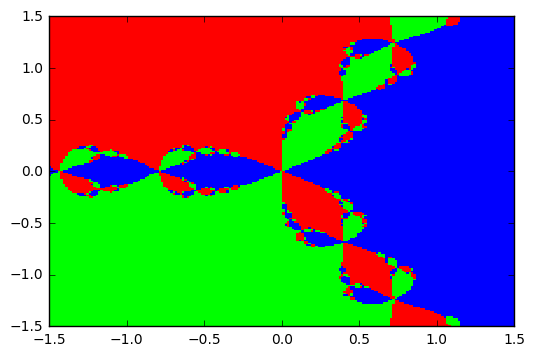

In [148]:
# Test Function 1
import matplotlib.pyplot as plt
import math
f = lambda x: x**3 - 1
f1 = lambda x: 3*x**2
bounds = [-1.5, 1.5, -1.5, 1.5]
roots = [1, -0.5+1j*math.sqrt(3)/2, -0.5-1j*math.sqrt(3)/2]
basins(f, f1, roots, bounds, 200, 5)


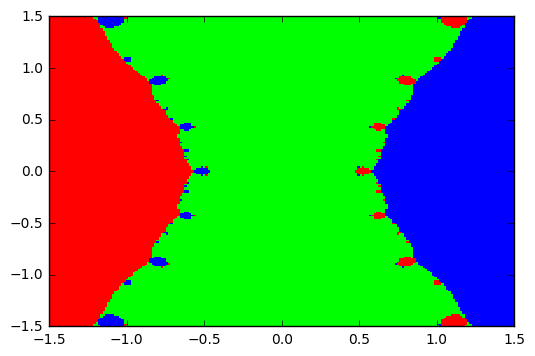

In [149]:
# Test Function 2
f = lambda x: x**3 - x
f1 = lambda x: 3*x**2-1
bounds = [-1.5, 1.5, -1.5, 1.5]
roots = [1,-1,0]
basins(f, f1, roots, bounds, 200, 5)